#**Loading the Data**

In [ ]:
# Access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pandas
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/grants.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Unnamed: 0,opportunity_id,opportunity_title,opportunity_number,opportunity_category,funding_instrument_type,category_of_funding_activity,cfda_numbers,eligible_applicants,eligible_applicants_type,...,post_date,close_date,last_updated_date,archive_date,award_ceiling,award_floor,estimated_total_program_funding,expected_number_of_awards,cost_sharing_or_matching_requirement,additional_information_url
0,0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,Discretionary,Cooperative Agreement,Other,19.040,Others,Non-Government Organization,...,2014-08-15,2014-09-04,2014-08-20,2014-10-04,600000.0,400000.0,600000.0,1.0,False,NaN
1,1,262308,Health and resiliency of salt marshes in Jamai...,NPS-14-NERO-0119,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-18,2014-08-23,2014-08-18,2014-08-24,275897.0,275897.0,275897.0,1.0,False,NaN
2,2,262368,Post-Hurricane Sandy submerged marine habitat ...,NPS-14-NERO-0125,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,480000.0,480000.0,480000.0,1.0,False,NaN
3,3,262390,Inventory and Monitoring of Amphibians and Rep...,NPS-14-NERO-0087,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,255577.0,255577.0,255577.0,1.0,False,NaN
4,4,131594,Youth Leadership Program with Algeria,ECA-PE-C-PY-12-09,Discretionary,Cooperative Agreement,Other,19.415,Others,Non-Government Organization,...,2011-11-21,2012-01-04,2011-11-21,2012-01-05,250000.0,NaN,250000.0,1.0,True,http://exchanges.state.gov/grants/open2.html


#**Preprocessing**

In [ ]:
# Import necessary libraries
import numpy as np  # Add this import for numpy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler

# Preprocess the data
df = df.dropna(subset=['opportunity_title', 'category_of_funding_activity'])
texts = df['opportunity_title'].astype(str).values
labels = df['category_of_funding_activity'].astype(str).values

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = 150
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority classes
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Compute class weights for the training set
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"Class weights: {class_weights_dict}")


Class weights: {0: 47.49764521193092, 1: 2.370045433181889, 2: 8.312087912087913, 3: 6.68788682581786, 4: 4.278280542986425, 5: 61.24696356275304, 6: 8.651987417786675, 7: 0.7063382747753005, 8: 2.7543013199817934, 9: 2.585982905982906, 10: 0.7757948717948718, 11: 5.662736290473517, 12: 0.16583900636914745, 13: 6.076722233380197, 14: 2.387061143984221, 15: 0.6249690159464596, 16: 8.025464190981433, 17: 32.324786324786324, 18: 1.272490221642764, 19: 0.2522636695626074, 20: 24.243589743589745, 21: 0.3109813756526744, 22: 6.947416762342136, 23: 5.554617220488343, 24: 0.23768225238813473, 25: 2.609175577785443}


#**Incorporate Pre-trained Embeddings**

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2024-12-01 20:21:40--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-01 20:21:41--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-01 20:21:41--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Load pre-trained GloVe embeddings
import numpy as np

embedding_index = {}
with open('glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# Create an embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


#**Hyperparameter Tuning**

In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Define the hyperparameter tuning function
def build_model(hp):
    selected_embedding_dim = hp.Choice('embedding_dim', values=[50, 100, 200])
    adjusted_embedding_matrix = np.zeros((embedding_matrix.shape[0], selected_embedding_dim))

    if selected_embedding_dim <= embedding_matrix.shape[1]:
        adjusted_embedding_matrix = embedding_matrix[:, :selected_embedding_dim]
    else:
        adjusted_embedding_matrix[:, :embedding_matrix.shape[1]] = embedding_matrix
        adjusted_embedding_matrix[:, embedding_matrix.shape[1]:] = np.random.uniform(
            -0.05, 0.05, (embedding_matrix.shape[0], selected_embedding_dim - embedding_matrix.shape[1])
        )

    model = Sequential([
        Embedding(
            input_dim=vocab_size,
            output_dim=selected_embedding_dim,
            input_length=max_sequence_length,
            weights=[adjusted_embedding_matrix],
            trainable=hp.Boolean('trainable_embeddings')
        ),
        LSTM(hp.Int('lstm_units', min_value=64, max_value=256, step=64), return_sequences=False),
        Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Set up Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='rnn_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Retrieve the best model
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

best_model = tuner.get_best_models(1)[0]


Trial 5 Complete [00h 07m 59s]
val_accuracy: 0.6905737519264221

Best val_accuracy So Far: 0.7569407820701599
Total elapsed time: 00h 39m 44s
Best Hyperparameters: {'embedding_dim': 200, 'trainable_embeddings': True, 'lstm_units': 64, 'dropout_rate': 0.2, 'dense_units': 256, 'learning_rate': 0.001}


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#**Train and Evaluate the Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,          # Stop after 3 epochs with no improvement
    restore_best_weights=True,
    verbose=1
)

# Train the model with early stopping
history = best_model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=15,  # Increased maximum epochs
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)


Epoch 1/15
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 110s 10ms/step - accuracy: 0.9608 - loss: 0.2028 - val_accuracy: 0.7242 - val_loss: 1.9471
Epoch 2/15
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 102s 9ms/step - accuracy: 0.9622 - loss: 0.1871 - val_accuracy: 0.7269 - val_loss: 2.0355
Epoch 3/15
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 94s 8ms/step - accuracy: 0.9607 - loss: 0.1927 - val_accuracy: 0.7281 - val_loss: 2.1122
Epoch 4/15
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - accuracy: 0.9632 - loss: 0.1823 - val_accuracy: 0.7271 - val_loss: 2.1598
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


#**Fine-Tune Model with a Lower Learning Rate**

In [ ]:
from tensorflow.keras.optimizers import Adam

# Adjust the learning rate for fine-tuning
best_model.compile(
    optimizer=Adam(learning_rate=1e-4),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine_tune = best_model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=5,  # Fine-tune for a smaller number of epochs
    batch_size=32
)


Epoch 1/5
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 95s 8ms/step - accuracy: 0.9696 - loss: 0.0930 - val_accuracy: 0.7606 - val_loss: 1.7541
Epoch 2/5
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - accuracy: 0.9745 - loss: 0.0735 - val_accuracy: 0.7620 - val_loss: 1.8045
Epoch 3/5
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - accuracy: 0.9761 - loss: 0.0667 - val_accuracy: 0.7616 - val_loss: 1.8435
Epoch 4/5
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 94s 8ms/step - accuracy: 0.9772 - loss: 0.0639 - val_accuracy: 0.7632 - val_loss: 1.8801
Epoch 5/5
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - accuracy: 0.9780 - loss: 0.0609 - val_accuracy: 0.7622 - val_loss: 1.9228


#**Testing Trainable Embeddings**

In [ ]:
# Rebuild the model with trainable embeddings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


model_with_trainable_embeddings = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=100,  # Match the dimensionality of the GloVe embedding matrix
        input_length=max_sequence_length,
        weights=[embedding_matrix],
        trainable=True  # Allow embeddings to be updated during training
    ),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_with_trainable_embeddings.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_with_trainable_embeddings = model_with_trainable_embeddings.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model_with_trainable_embeddings.evaluate(X_test, y_test)
print(f"Model with Trainable Embeddings - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Epoch 1/10
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - accuracy: 0.6468 - loss: 1.2284 - val_accuracy: 0.6919 - val_loss: 1.1050
Epoch 2/10
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 92s 8ms/step - accuracy: 0.8877 - loss: 0.3744 - val_accuracy: 0.7171 - val_loss: 1.1636
Epoch 3/10
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 92s 8ms/step - accuracy: 0.9190 - loss: 0.2677 - val_accuracy: 0.7162 - val_loss: 1.2813
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6938 - loss: 1.0922
Model with Trainable Embeddings - Test Loss: 1.1050, Test Accuracy: 0.6919


#**Visualize Training Progress**

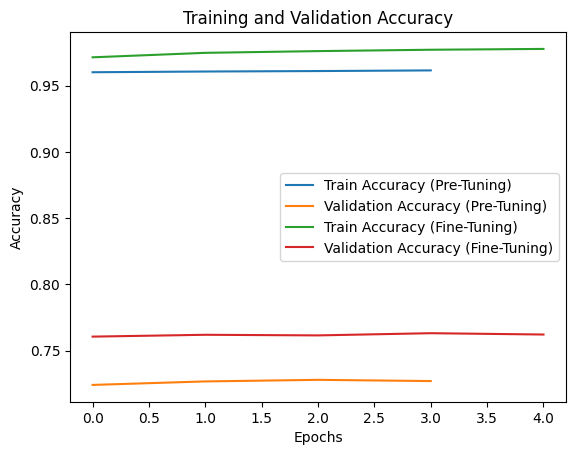

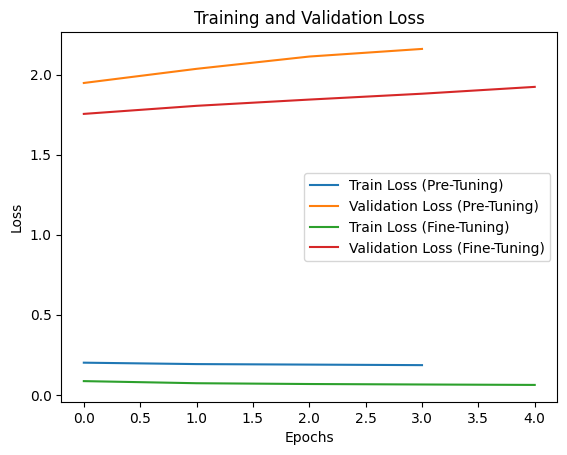

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy (Pre-Tuning)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Pre-Tuning)')
plt.plot(history_fine_tune.history['accuracy'], label='Train Accuracy (Fine-Tuning)')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy (Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss (Pre-Tuning)')
plt.plot(history.history['val_loss'], label='Validation Loss (Pre-Tuning)')
plt.plot(history_fine_tune.history['loss'], label='Train Loss (Fine-Tuning)')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss (Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


#**Updated Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length, weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(256, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model with a lower learning rate and optional focal loss
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)


Epoch 1/10
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 171s 15ms/step - accuracy: 0.2974 - loss: 11.8811 - val_accuracy: 0.1144 - val_loss: 4.6931
Epoch 2/10
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 167s 15ms/step - accuracy: 0.5603 - loss: 3.7183 - val_accuracy: 0.1809 - val_loss: 3.6725
Epoch 3/10
11403/11403 ━━━━━━━━━━━━━━━━━━━━ 166s 15ms/step - accuracy: 0.6405 - loss: 2.4219 - val_accuracy: 0.1971 - val_loss: 3.3743
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


In [ ]:
loss, accuracy = model_with_trainable_embeddings.evaluate(X_test, y_test)
print(f"Final Model - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7264 - loss: 1.0024
Final Model - Test Loss: 1.0035, Test Accuracy: 0.7295


#**Save Model**

In [ ]:
# Save  model and tokenizer
model.save('rnn_funding_category_model_2.h5')

import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
